In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
p4=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m4_p_5yr.csv')
p3=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m3_p_5yr.csv')
f4=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m4_f_5yr.csv')
f3=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m3_f_5yr.csv')

In [3]:
phs4=p4['Hs'].values
pt4=p4['time'].values

phs3=p3['Hs'].values
pt3=p3['time'].values

fhs4=f4['Hs'].values
ft4=f4['time'].values

fhs3=f3['Hs'].values
ft3=f3['time'].values


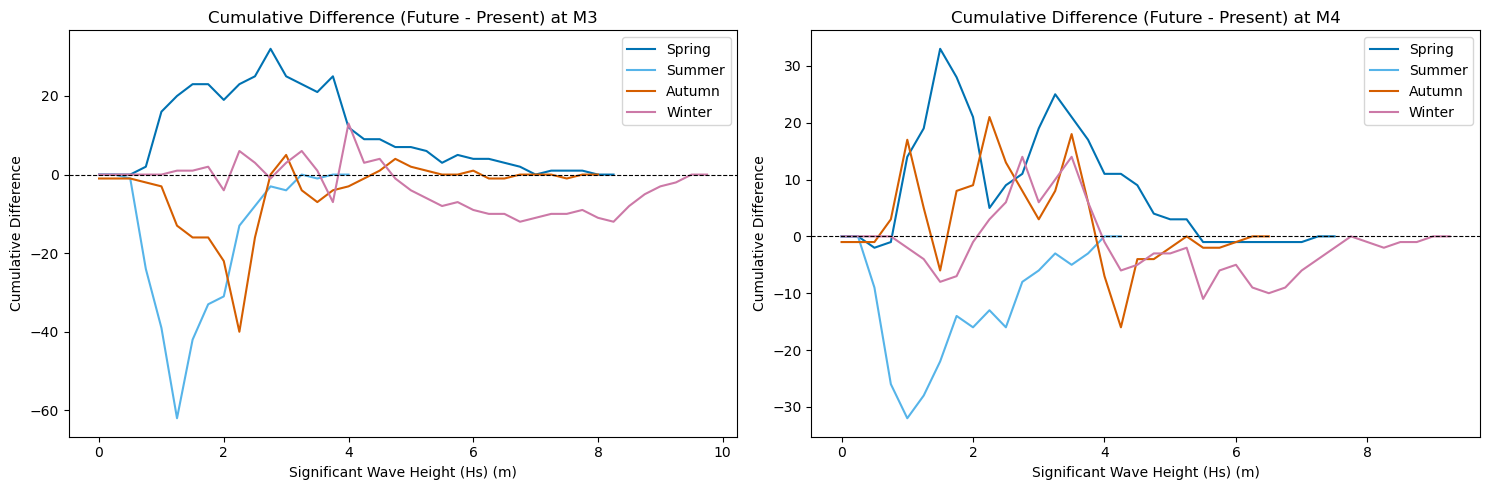

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `p3`, `f3`, `p4`, and `f4` are your DataFrames
p3['time'] = pd.to_datetime(p3['time'], errors='coerce')  # Convert to datetime
f3['time'] = pd.to_datetime(f3['time'], errors='coerce')  # Convert to datetime
p4['time'] = pd.to_datetime(p4['time'], errors='coerce')  # Convert to datetime
f4['time'] = pd.to_datetime(f4['time'], errors='coerce')  # Convert to datetime

# Define seasons
seasons = {
    'Spring': [3, 4, 5],  # March, April, May
    'Summer': [6, 7, 8],  # June, July, August
    'Autumn': [9, 10, 11],  # September, October, November
    'Winter': [12, 1, 2]  # December, January, February
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
datasets = [(p3, f3, axes[0], '3'), (p4, f4, axes[1], '4')]
colorblind_palette = ['#0072B2', '#56B4E9', '#D55E00', '#CC79A7']  # Blue, Light Blue, Orange, Yellow

# Iterate over datasets (3 and 4)
for present_data, future_data, ax, label in datasets:
    # Iterate through each season with an enumerated loop for color selection
    for i, (season, months) in enumerate(seasons.items()):
        # Filter data for the season
        season_present = present_data[present_data['time'].dt.month.isin(months)]
        season_future = future_data[future_data['time'].dt.month.isin(months)]
        
        # Extract Hs data
        hs_present = season_present['Hs']
        hs_future = season_future['Hs']
        
        # Define custom bin edges
        bin_edges = np.arange(0, max(max(hs_present, default=0), max(hs_future, default=0)) + 0.5, 0.25)
        
        # Compute histogram frequencies for cumulative frequency
        phs_freq, _ = np.histogram(hs_present, bins=bin_edges)
        fhs_freq, _ = np.histogram(hs_future, bins=bin_edges)
        
        # Compute cumulative frequencies
        phs_cumulative = np.cumsum(phs_freq)
        fhs_cumulative = np.cumsum(fhs_freq)
        
        # Compute the difference in cumulative frequencies
        cumulative_diff = fhs_cumulative - phs_cumulative
        
        # Plot the cumulative difference for the season
        ax.plot(bin_edges[:-1], cumulative_diff, label=f'{season}', color=colorblind_palette[i])

    # Add labels and title to the subplot
    ax.set_xlabel('Significant Wave Height (Hs) (m)')
    ax.set_ylabel('Cumulative Difference')
    ax.set_title(f'Cumulative Difference (Future - Present) at M{label}')
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)#, label='Reference Line (0)')
    ax.legend()
    ax.grid(False)

# Adjust layout and show the plots
plt.tight_layout()
#plt.savefig('/work/uo1075/b381754/data/wam/Validate/SWAN/plots/p_f/distribution/season_cum_diff_m3m4.png')
